## Analyse jährliche CO2-Emission
Gruppe: Jessica Itulah, Michelle Assadi, Medhani Kathirkamanathan

Fragestellung:

Welche Unterschiede und Trends lassen sich in den CO₂-Emissionen pro Kopf ausgewählter Länder über den Zeitraum 2013–2023 identifizieren, und welche Faktoren könnten diese Entwicklungen beeinflusst haben?

Quellen

https://ourworldindata.org/grapher/annual-co2-emissions-per-country

https://de.statista.com/statistik/daten/studie/1722/umfrage/bevoelkerungsreichste-laender-der-welt/
 

## 1. Daten beschaffen und laden

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('annual-co2-emissions-per-country.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Tonnen']) 
df.head() 

,Gebiet,Code,Jahr,Tonnen
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


## 2. Daten vorbereiten

In [4]:
df_pivot = df.pivot(index='Gebiet', columns='Jahr', values='Tonnen')
df_pivot.head()

Jahr,1750,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.384400e+06,8.605932e+06,9.311054e+06,1.019150e+07,1.040011e+07,1.111863e+07,9.868841e+06,1.016989e+07,1.051632e+07,1.082600e+07
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.335946e+09,1.367232e+09,1.377318e+09,1.391187e+09,1.456083e+09,1.369249e+09,1.475349e+09,1.459114e+09,1.481814e+09,1.502099e+09
Africa (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.335935e+09,1.367218e+09,1.377307e+09,1.391176e+09,1.456068e+09,1.369238e+09,1.475342e+09,1.459103e+09,1.481803e+09,1.502087e+09
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.712144e+06,4.555035e+06,5.343792e+06,5.194860e+06,4.940528e+06,4.865033e+06,5.137011e+06,4.498282e+06,4.417333e+06,4.444448e+06
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.603216e+08,1.583083e+08,1.652516e+08,1.744612e+08,1.824250e+08,1.711385e+08,1.820358e+08,1.927786e+08,2.028467e+08,1.982032e+08


## 3. Statistik der Roh-Daten

In [5]:
df.dtypes

Gebiet     object
Code       object
Jahr        int64
Tonnen    float64
dtype: object

### 3.1 Analyse Gebiete

In [6]:
print('Anzahl verschiedener Gebiete: ', len(df['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  247


In [7]:
df['Gebiet'].value_counts()

Gebiet
Australia                       275
Asia (excl. China and India)    275
Asia                            275
Europe                          275
Europe (excl. EU-27)            275
                               ... 
Marshall Islands                 33
Micronesia (country)             33
Kuwaiti Oil Fires (GCP)          32
Kosovo                           31
East Timor                       31
Name: count, Length: 247, dtype: int64

Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

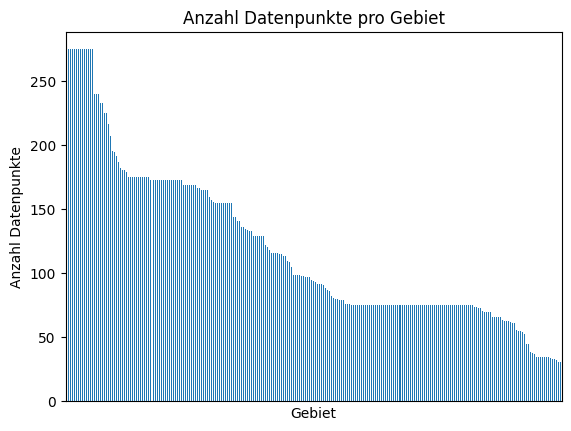

In [8]:
df['Gebiet'].value_counts().plot(kind='bar',
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

### 3.2 Analyse Codes

In [9]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  218


In [10]:
df['Code'].value_counts()

Code
AUS         275
GBR         275
OWID_WRL    275
NOR         275
TWN         275
           ... 
NAM          34
FSM          33
MHL          33
TLS          31
OWID_KOS     31
Name: count, Length: 217, dtype: int64

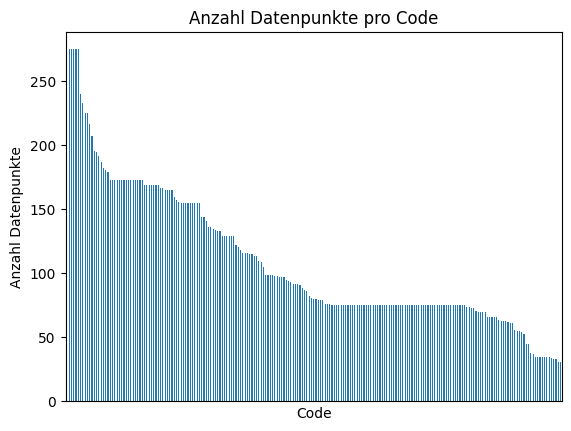

In [13]:
df['Code'].value_counts().plot(kind='bar' ,xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [14]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  275


In [15]:
df['Jahr'].value_counts().sort_index()

Jahr
1750     14
1751     14
1752     14
1753     14
1754     14
       ... 
2020    247
2021    247
2022    247
2023    247
2024    247
Name: count, Length: 275, dtype: int64

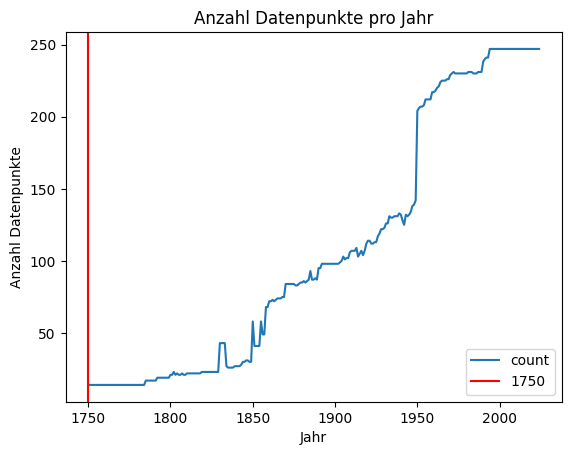

In [17]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=1750, color='red',label='1750')
g.legend()

### 3.4 Analyse CO2-Emission

In [18]:
df.describe()

,Jahr,Tonnen
count,29384.000000,2.938400e+04
mean,1948.359243,4.202270e+08
std,59.148142,1.972092e+09
min,1750.000000,0.000000e+00
25%,1913.000000,3.810560e+05
50%,1963.000000,5.080756e+06
75%,1995.000000,5.365634e+07
max,2024.000000,3.859858e+10


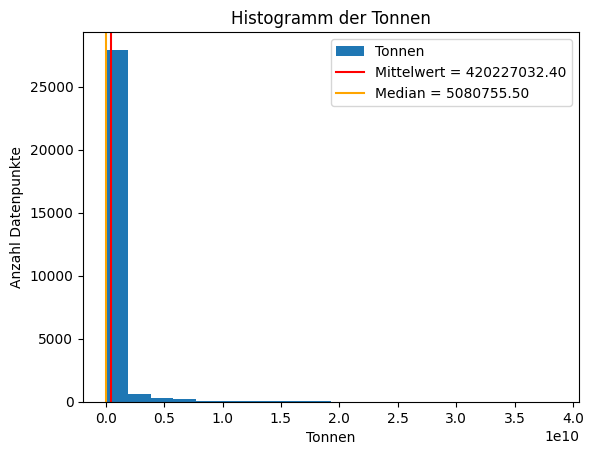

In [19]:
g = df['Tonnen'].plot(kind='hist', bins=20, title='Histogramm der Tonnen',
                           xlabel='Tonnen', ylabel='Anzahl Datenpunkte')
mean = df['Tonnen'].mean()
g.axvline(x=df['Tonnen'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')
 
median = df['Tonnen'].median()
g.axvline(x=df['Tonnen'].median(), color='orange',label=  f'Median = {median:.2f}')
 
g.legend()

## 4. Analyse

### Vorgehen

### Beobachtungen

### Interpretation